<a href="https://colab.research.google.com/github/trashpanda900/Data-Science/blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?
No its about comparing models

**Task2**:

Describe overfitting, in the context of this course
We make the models too fixated on that data set and they won't work on new data sets.

**Task3**:

How do we mitigate overfitting?
Have less noise

**Task4**:

How do we mitigate underfitting? Training the model better

**Task5**:

Why would we want more than one predictor in a model?
Because there is almost always multiple factors.

**Task6**:

Can we have too many predictors? How would we know?
Yes, I think it would not work on new data/ it would overfit.

**Task7**:

What is variable selection, and how does it work?
You add variables that go into your model starting the most important factors and stopping when you've added too many.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

Tbh I have no idea what this is asking

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?
We can do it using the scatter plots as well as the bambi intercepts.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.5 MB/s eta 0:00:00


In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
bmb_model_1 = bmb.Model("FGp ~ FTp + Pos", data=bb)
bmb_idata_1 = bmb_model_1.fit()

display(bmb_idata_1)

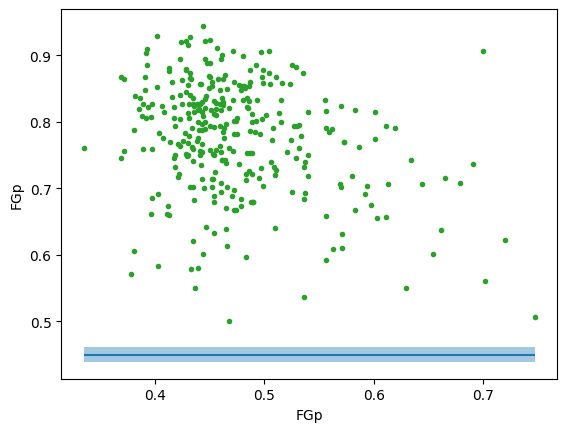

In [22]:
bmb.interpret.plot_predictions(bmb_model_1, bmb_idata_1, "FGp")
plt.plot(bb.FGp, bb.FTp, "C2.", zorder=-3)

In [ ]:
bmb_model_2 = bmb.Model("FGp ~ FTp * Pos", data=bb)
bmb_idata_2 = bmb_model_2.fit(target_accept=0.99)

display(bmb_idata_2)

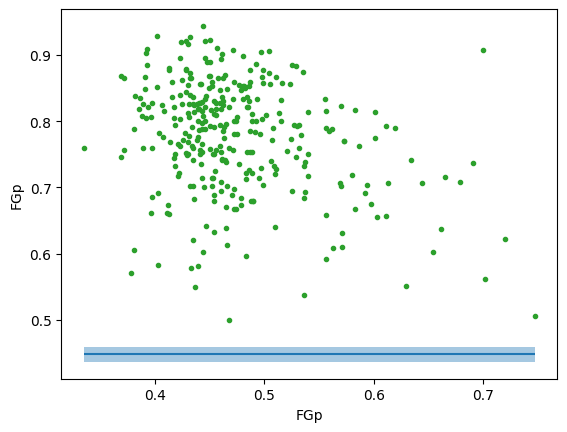

In [23]:
bmb.interpret.plot_predictions(bmb_model_2, bmb_idata_2, "FGp")
plt.plot(bb.FGp, bb.FTp, "C2.", zorder=-3)

In [ ]:
bb.rename(columns={"3PA": "ThreeP_Attempts"}, inplace=True)
# Explicitly list all main effects and interaction terms with the renamed column
formula_explicit = "FGp ~ FTp + Pos + ThreeP_Attempts + FTp:Pos + FTp:ThreeP_Attempts + Pos:ThreeP_Attempts + FTp:Pos:ThreeP_Attempts"
bmb_model_3 = bmb.Model(formula_explicit, data=bb)
bmb_idata_3 = bmb_model_3.fit(target_accept=0.99, max_treedepth=15)

display(bmb_idata_3)

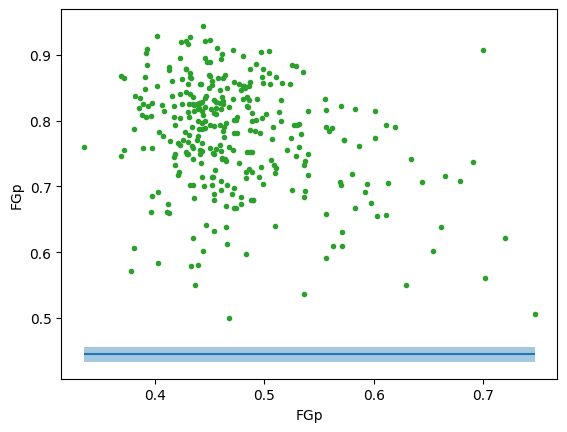

In [24]:
bmb.interpret.plot_predictions(bmb_model_3, bmb_idata_3, "FGp")
plt.plot(bb.FGp, bb.FTp, "C2.", zorder=-3)

In [ ]:
bmb_model_4 = bmb.Model("FGp ~ FTp + Pos + ThreeP_Attempts + ThreeP_Attempts:Pos", data=bb)
bmb_idata_4 = bmb_model_4.fit(target_accept=0.99, max_treedepth=15)

display(bmb_idata_4)

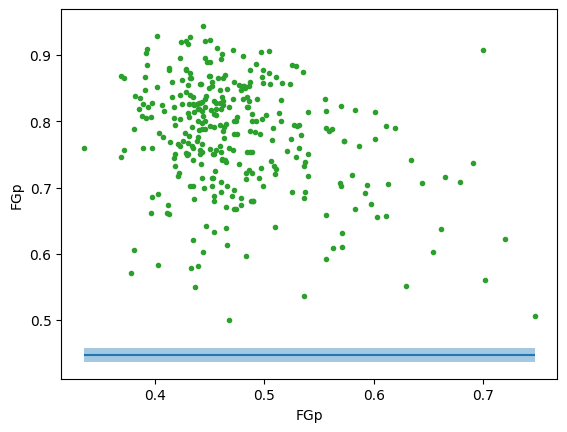

In [25]:
bmb.interpret.plot_predictions(bmb_model_4, bmb_idata_4, "FGp")
plt.plot(bb.FGp, bb.FTp, "C2.", zorder=-3)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

I must not have done it correctly because I got the same each time.

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?
Probably siri since there are a lot of different things that cause it

In [26]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [27]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


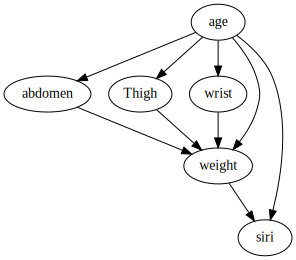

In [29]:


b_dag = gv.Digraph(name="Bikes DAG")

b_dag.node('B','abdomen')
b_dag.node('T','Thigh')
b_dag.node('R','wrist')
b_dag.node('A','age')
b_dag.node('W','weight')
b_dag.node('S','siri')

b_dag.edges(['AB','AT','AR','AW','BW','TW','RW','WS','AS'])

b_dag